## Mergin in pandas

In [99]:
import pandas as pd
import numpy as np

In [100]:
courses = pd.read_csv('G:\WORK\python\Pandas\Dataset\courses.csv')
students = pd.read_csv('G:\WORK\python\Pandas\Dataset\students.csv')


In [101]:
matches = pd.read_csv('G:\WORK\python\Pandas\Dataset\matches.csv')
delivery = pd.read_csv('G:\WORK\python\Pandas\Dataset\deliveries.csv')

In [102]:
nov = pd.read_csv('G:\WORK\python\Pandas\Dataset\Aeg-month1.csv')
dec = pd.read_csv('G:\WORK\python\Pandas\Dataset\Aeg-month2.csv')

In [103]:
dec

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9
5,7,7
6,7,2
7,16,3
8,17,10
9,11,8


In [104]:
# pd.concat
# df.concat
# ignore_index
# df.append(invilid)
# mullitindex -> fetch using iloc
# concat dataframes horizontally

In [105]:
regs = pd.concat([nov,dec],ignore_index=True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [106]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])
# Multiindex DataFrame
multi.loc[('Dec',4)]

student_id    14
course_id      9
Name: (Dec, 4), dtype: int64

In [107]:
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


### join
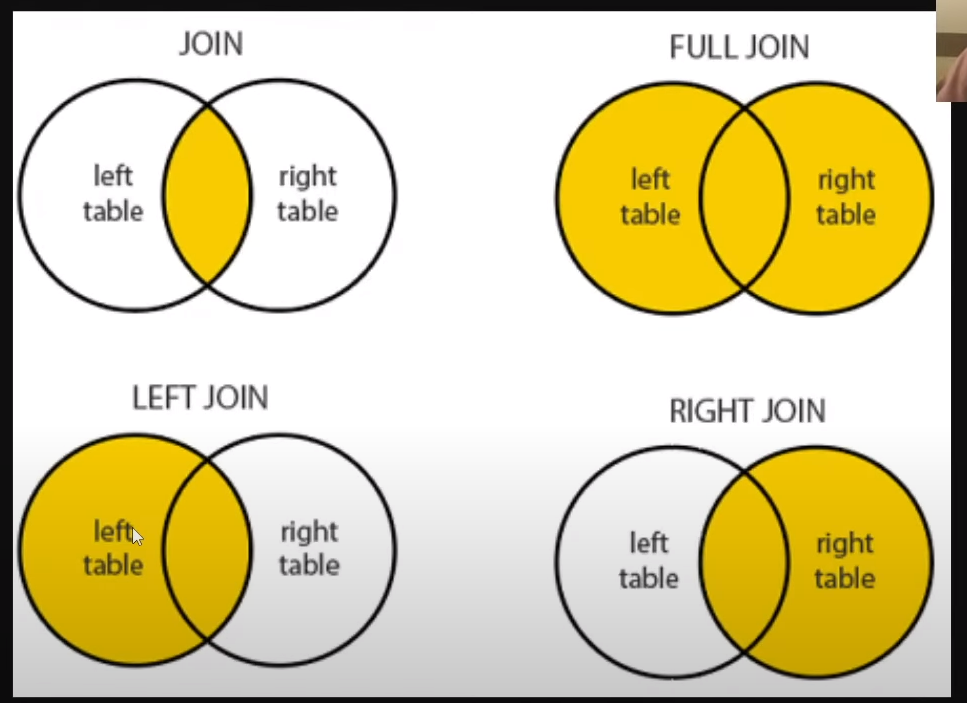

In [108]:
student=students.sample(5)
student

,student_id,name,partner
16,17,Yasmin Palan,7
23,24,Radhika Suri,17
6,7,Tarun Thaker,9
5,6,Lakshmi Contractor,10
2,3,Parveen Bhalla,3


In [109]:
reg=regs.sample(5)
reg

,student_id,course_id
28,12,1
27,12,10
33,17,10
9,15,1
22,19,2


In [110]:
# inner join
student.merge(reg,how='inner',on='student_id')

,student_id,name,partner,course_id
0,17,Yasmin Palan,7,10


In [111]:
course=courses.sample(5)
course

,course_id,course_name,price
5,6,power bi,1899
4,5,tableau,2499
11,12,C++,1299
2,3,data analysis,4999
3,4,machine learning,9999


In [112]:
# left join
course.merge(reg,how='left',on='course_id')

,course_id,course_name,price,student_id
0,6,power bi,1899,NaN
1,5,tableau,2499,NaN
2,12,C++,1299,NaN
3,3,data analysis,4999,NaN
4,4,machine learning,9999,NaN


In [113]:
# right join
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})

students = pd.concat([students,temp_df],ignore_index=True)

In [114]:
students.tail()

,student_id,name,partner
23,24,Radhika Suri,17
24,25,Shashank D’Alia,2
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,17


In [115]:
students.merge(regs,how='right',on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [116]:
regs.merge(students,how='left',on='student_id')

,student_id,course_id,name,partner
0,23,1,Chhavi Lachman,18.0
1,15,5,Preet Sha,16.0
2,18,6,Fardeen Mahabir,13.0
3,23,4,Chhavi Lachman,18.0
4,16,9,Elias Dodiya,25.0
5,18,1,Fardeen Mahabir,13.0
6,1,1,Kailash Harjo,23.0
7,7,8,Tarun Thaker,9.0
8,22,3,Yash Sethi,21.0
9,15,1,Preet Sha,16.0


In [117]:
# outer join
students.merge(regs,how='outer',on='student_id').tail(10)

,student_id,name,partner,course_id
53,23,Chhavi Lachman,18.0,5.0
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,26,Nitish,28.0,NaN
58,27,Ankit,26.0,NaN
59,28,Rahul,17.0,NaN
60,42,NaN,NaN,9.0
61,50,NaN,NaN,8.0
62,38,NaN,NaN,1.0


In [118]:
# 1. find total revenue generated
total = regs.merge(courses,how='inner',on='course_id')['price'].sum()
total

154247

In [119]:
# 2. find month by month revenue
temp_df = pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()
temp_df.merge(courses,on='course_id').groupby('level_0')['price'].sum()

level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

In [120]:
# 3. Print the registration table
# cols -> name -> course -> price
regs.merge(students,on='student_id').merge(courses,on='course_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,python,2499
2,Fardeen Mahabir,python,2499
3,Kailash Harjo,python,2499
4,Seema Kota,python,2499
5,Shashank D’Alia,python,2499
6,Radha Dutt,python,2499
7,Pranab Natarajan,python,2499
8,Chhavi Lachman,machine learning,9999
9,Qabeel Raman,machine learning,9999


<Axes: ylabel='price'>

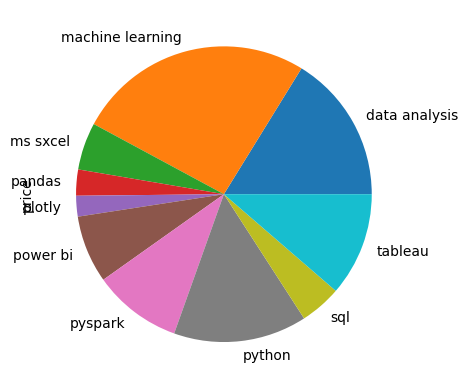

In [121]:
# 4. Plot bar chart for revenue/course
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind='pie')

<Axes: xlabel='course_name'>

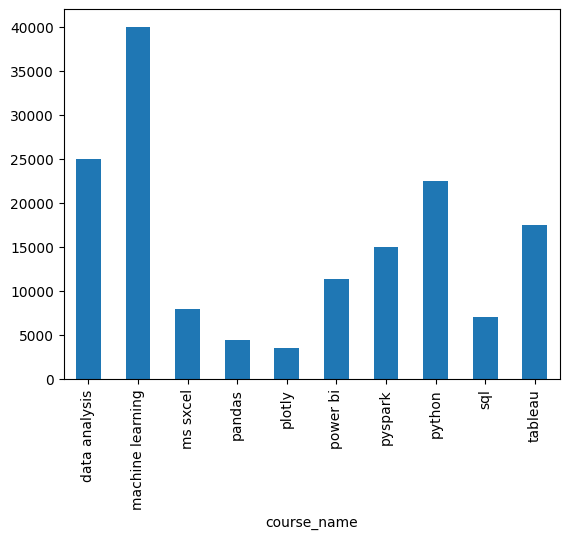

In [122]:
# 4. Plot bar chart for revenue/course
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

In [123]:
# 5. find students who enrolled in both the months
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23], dtype=int64)

In [124]:
students[students['student_id'].isin(common_student_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [125]:
# 6. find course that got no enrollment
# courses['course_id']
# regs['course_id']

course_id_list = np.setdiff1d(courses['course_id'],regs['course_id'])
courses[courses['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [126]:
# 7. find students who did not enroll into any courses
student_id_list = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(student_id_list)].shape[0]

(10/28)*100

35.714285714285715

In [127]:
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [128]:
# 8. Print student name -> partner name for all enrolled students
# self join
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


In [129]:
# 9. find top 3 students who did most number enrollments
regs.merge(students,on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: name, dtype: int64

In [130]:
# 10. find top 3 students who spent most amount of money on courses
regs.merge(students,on='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

In [131]:
# Alternate syntax for merge
# students.merge(regs)

pd.merge(students,regs,how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [132]:
# IPL Problems

# find top 3 studiums with highest sixes/match ratio
# find orange cap holder of all the seasons

In [133]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [134]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [135]:
temp_df = delivery.merge(matches,left_on='match_id',right_on='id')

In [136]:
six_df = temp_df[temp_df['batsman_runs'] == 6]

In [137]:
# stadium -> sixes
num_sixes = six_df.groupby('venue')['venue'].count()

In [138]:
num_matches = matches['venue'].value_counts()

In [139]:
(num_sixes/num_matches).sort_values(ascending=False).head(10)

venue
Holkar Cricket Stadium                                 17.600000
M Chinnaswamy Stadium                                  13.227273
Sharjah Cricket Stadium                                12.666667
Himachal Pradesh Cricket Association Stadium           12.000000
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    11.727273
Wankhede Stadium                                       11.526316
De Beers Diamond Oval                                  11.333333
Maharashtra Cricket Association Stadium                11.266667
JSCA International Stadium Complex                     10.857143
Sardar Patel Stadium, Motera                           10.833333
dtype: float64

In [140]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [141]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


In [142]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False)

,season,batsman,batsman_runs
1383,2016,V Kohli,973
1278,2016,DA Warner,848
910,2013,MEK Hussey,733
684,2012,CH Gayle,733
852,2013,CH Gayle,720
...,...,...,...
1467,2017,MM Patel,0
658,2012,AC Blizzard,0
475,2011,AB Dinda,0
1394,2017,AD Nath,0
